# Perceptron including
- input
- processor
- output
- weights 介於 -1 ~ 1 之間
- activation function 用來 predict output，有很多不同的function，根據你用的target不同有所不同
- cost funcition 用來判斷誤差
- backprobagation 調整誤差，<b>至於要調整的何時，調整到最靠進我是我們滿意</b>
- 避免 input 都為0  => 加入bias(就是係他)

# Deep Learning
- 很多個perceptron 所組成，有很多node(layer)所組成的 Neural Network

# Tensorflow
- 想像是一個 Data Flow Graph

# 2 Tensorflow Basic

In [6]:
import tensorflow as tf

In [8]:
hello=tf.constant("Hello world")

In [9]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [12]:
x=tf.constant(100)
type(x)

tensorflow.python.framework.ops.Tensor

## 2.1 Session:run tensor operation

In [13]:
sess=tf.Session()

In [17]:
# b is Unicode indication
type(sess.run(hello))

bytes

In [15]:
sess.run(x)

100

In [16]:
type(sess.run(x))

numpy.int32

## 2.2 operation
- constant ： 就很像是 input
    - sess.run(constant) 回傳numpy
- 透過 tf.{function}，將這些input帶入function參數
- session run the function (run activation)
- recive input(constant) ，透過tf function 並用session run 這個function 產生output
- session run 整個Data Flow 的過程

In [19]:
x=tf.constant(2)
y=tf.constant(3)

In [22]:
#要做什麼
with tf.Session() as sess:
    print("Operations with constant")
    print("Addition",sess.run(x+y))
    print("Subtraction",sess.run(x-y))
    print("Multiplation",sess.run(x*y))
    print("Division",sess.run(x/y))

Operations with constant
Addition 5
Subtraction -1
Multiplation 6
Division 0.6666666666666666


In [27]:
x = tf.placeholder(tf.int32)
y= tf.placeholder(tf.int32)

In [33]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)


In [38]:
with tf.Session() as sess:
    print("Operation with place holder")
    print("additoon",sess.run(add,feed_dict={x:20,y:30}))

Operation with place holder
additoon 50


In [51]:
a=np.array([[5.0,5.0]])
b=np.array([2.0,2.0]).reshape(2,1)

In [54]:
mat1=tf.constant(a)

In [55]:
mat2=tf.constant(b)

In [56]:
matrix_multi=tf.matmul(mat1,mat2)

In [60]:
with tf.Session() as sess:
    print("result is :",sess.run(matrix_multi))

result is : [[20.]]


# 3. MINST with Multi-Layer Perceptron 
- 手寫辨識資源庫，判斷數字的

In [61]:
from tensorflow.examples.tutorials.mnist import input_data

In [63]:
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [64]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

## 3.1 一張圖有784個pixel ，每個pixel的數值代表顏色深淺
- training data 有 55000張
- testing data 有 10000張
- input 是 一張裡面的全部特徵
- output 就是 0-9 10 個代表label或是target有10個
- #cost function 會用到 learning rate ，越低代表會更快優化

In [92]:
mnist.train.images.shape

(55000, 784)

In [95]:
sample=mnist.train.images[3].reshape(28,28)

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

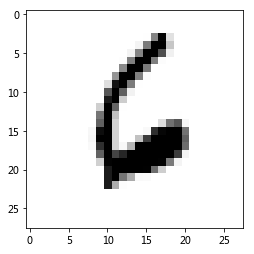

In [97]:
#imshow（可以帶入二為矩陣show圖，這個二維矩陣數字代表像素顏色的深淺）
# imshow(數字大小代表像素的顏色深淺)
plt.imshow(sample,cmap="Greys")

In [191]:
#cost function 會用到 learning rate ，越低代表會更快優化
learning_rate=0.001
training_epoch=15
batch_size=100

In [87]:
n_classes=10 #
n_samples=mnist.train.num_examples

In [89]:
n_input=784

In [114]:
n_hidden_1=256 #hidden layer 1 有 256個neuron
n_hidden_2=256

# 3.1 透過 tensorflow 建立深度學習模型

In [123]:
def multilayerPerceptron(x,weights,biases):
    """
    x:Placeholder
    weights:Dict of weights
    biases:dict of bias of value
    
    """
    # relu rectified linear uont 線性整流函數
    
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    # Activate Function:relu (激勵函數：主要是引入非線性)
    ## nn 是 neural network
    # Func(X * W + B) = RELU => f(x) = max(0,x)
    layer_1=tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2=tf.add(tf.matmul(layer_1,weights["h2"]),biases["b2"])
    layer_2=tf.nn.relu(layer_2)
    
    #Last output Layer 
    out_layer = tf.matmul(layer_2,weights["out"])+biases["out"]
    
    return out_layer

# 3.2 設定參數

In [117]:
weights={
    # 權重個數做交叉相乘得出有多少個權重（多少條edge）
    "h1":tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    "h2":tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [118]:
biases={
    "b1":tf.Variable(tf.random_normal([n_hidden_1])),
    "b2":tf.Variable(tf.random_normal([n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_classes]))
}

In [120]:
# 因為後面要矩陣所以這裡shape是（none,feature數）
x=tf.placeholder("float",[None,n_input]) # x 餵像素
y=tf.placeholder("float",[None,n_classes]) # y 判別為哪個數值

In [124]:
pred=multilayerPerceptron(x,weights,biases)

In [130]:
# reduce_mean 先降維再平均
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# 4. Training Model Run the Session

In [175]:
# 從training data 任選幾筆資料
t=mnist.train.next_batch(1)

In [172]:
# t[0] 代表 feature，t[1] 代表 label

In [178]:
x,y=t

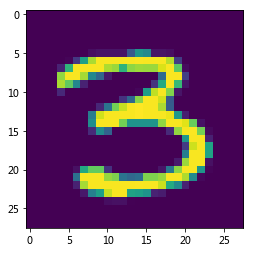

In [180]:
plt.imshow(x.reshape(28,28))

In [182]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [183]:
sess = tf.InteractiveSession()

In [185]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [186]:
sess.run(init)

In [198]:
# 15 loops
for epoch in range(training_epoch):
    #Cost
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    
    for i in range(total_batch):
        #next_batch 不會每次都取一樣的
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        
        # 我們只需要cost funtion就好
        _, c = sess.run([optimizer,cost], feed_dict={x:batch_x, y:batch_y})
        avg_cost += c/total_batch
    print("Epoch:{} cost:{:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of training".format(training_epoch))

TypeError: unhashable type: 'numpy.ndarray'

In [199]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
 
y = tf.nn.softmax(tf.matmul(x, W) + b)
 
y_ = tf.placeholder(tf.float32, [None, 10])
 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
 
sess = tf.InteractiveSession()
 
tf.global_variables_initializer().run()
 
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.9175


# 4. 建立深度學習的另一種方式 
- tensorflow.contrib.learn SKFlow
- 因為 Tensor flow 還算蠻複雜的，所以Sklearn 建立一個API接口到Tensorflow 叫做skflow
- from tenserflow.contlib.learn

In [200]:
from sklearn.datasets import load_iris

In [201]:
iris=load_iris()

In [202]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [203]:
x=iris["data"]
y=iris["target"]

In [206]:
y.dtype

dtype('int64')

In [207]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [208]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [217]:
import tensorflow.contrib.learn as learn

In [220]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [227]:
#設定
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
classifier=learn.DNNClassifier(hidden_units=[10,20,10],feature_columns=feature_columns,n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c251b8e10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/np/5vqp70vx075czzm7wv6l_8n40000gn/T/tmprupv6892'}


In [228]:
classifier.fit(X_train,y_train,steps=200,batch_size=32)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/np/5vqp70vx075czzm7wv6l_8n40000gn/T/tmprupv6892/model.ckpt.
INFO:tensorflow:loss = 1.0640442, step = 1
INFO:tensorflow:global_step/sec: 1194
INFO:tensorflow:loss = 0.19479215, step = 101 (0.084 sec)
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/np/5vqp70vx075czzm7wv6l_8n40000gn/T/tmprupv6892/model.ckpt.
INFO:tensorflow:Loss for final step: 0.13069391.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1c251b8b00>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10edf7598>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [233]:
iris_predictions = classifier.predict(X_test)


INFO:tensorflow:Restoring parameters from /var/folders/np/5vqp70vx075czzm7wv6l_8n40000gn/T/tmprupv6892/model.ckpt-200


In [234]:
iris_predictions

<generator object DNNClassifier.predict_classes.<locals>.<genexpr> at 0x1c21f6e1a8>

# Reference

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
 
y = tf.nn.softmax(tf.matmul(x, W) + b)
 
y_ = tf.placeholder(tf.float32, [None, 10])
 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
 
sess = tf.InteractiveSession()
 
tf.global_variables_initializer().run()
 
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [225]:
#Imports
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
 
# Data sets
iris = load_iris()
X =np.float32(iris['data']) 
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
 
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
 
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="./output")
 
# Fit model.
classifier.fit(X_train, y_train, steps=2000)
 
# Evaluate accuracy.
accuracy_score = classifier.evaluate(X_test, y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))
 
#Evaluate with classification report and confusion matrix
iris_predictions = list(classifier.predict(X_test))
print(classification_report(y_test,  iris_predictions))
print('\n')
print(confusion_matrix(y_test,  iris_predictions))
print('\n')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c251b9320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './output'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into ./output/model.ckpt.
INFO:tensorflow:loss = 0.06180684, step = 2001
INFO:tensorflow:global_step/sec: 1001.18
INFO:tensorflow:loss = 0.05985032, step = 2101 (0.101 sec)
INF